In [1]:
import math
from collections import deque
#from turtle import forward

import numpy as np
import torch 
from torch import dropout, nn
import torch.nn.functional as F
from torchvision import models
from torchvision.models._utils import IntermediateLayerGetter
import os, torch, torchvision
from torch.utils.data import DataLoader

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from v3.models.Demo import DemoNet
from v3.config import GlobalConfig

In [3]:
from utils.datasets.carla_data import CARLA_Data

In [4]:
config = GlobalConfig()

In [5]:
model = DemoNet(config, "cuda")

In [17]:
model.load_state_dict(torch.load('/root/End2End/v3/seg/seg/model_101.pth'))

<All keys matched successfully>

In [7]:
val_set = CARLA_Data(root=config.val_data, config=config)
dataloader_val = DataLoader(val_set, batch_size=1, shuffle=False, num_workers=1, pin_memory=True)

100%|██████████| 1/1 [00:00<00:00, 44.26it/s]


In [8]:
data = None
for data in dataloader_val:
    break


In [9]:
fronts_in = data['fronts']
seg_fronts_in = data['seg_fronts']
lefts_in = data['lefts']
seg_lefts_in = data['seg_lefts']
rights_in = data['rights']
seg_rights_in = data['seg_rights']
fronts = []
seg_fronts = []
seg_lefts = []
seg_rights = []
lefts = []
rights = []
for i in range(config.seq_len):
	fronts.append(fronts_in[i].to('cuda', dtype=torch.float32))
	lefts.append(lefts_in[i].to('cuda', dtype=torch.float32))
	rights.append(rights_in[i].to('cuda', dtype=torch.float32))
	seg_fronts.append(seg_fronts_in[i].to('cuda', dtype=torch.long))
	seg_lefts.append(seg_lefts_in[i].to('cuda', dtype=torch.long))
	seg_rights.append(seg_rights_in[i].to('cuda', dtype=torch.long))


fronts = torch.cat(fronts, dim=1)
seg_fronts = torch.cat(seg_fronts, dim=1)
seg_lefts = torch.cat(seg_lefts, dim=1)
seg_rights = torch.cat(seg_rights, dim=1)
lefts = torch.cat(lefts, dim=1)
rights = torch.cat(rights, dim=1)
image = torch.cat((fronts, lefts, rights), dim=0)
seg_label = torch.cat((seg_fronts, seg_lefts, seg_rights), dim=0)

In [18]:
with torch.no_grad():
    pred = model.train_seg(image)

In [19]:
pred.max()

tensor(30.5536, device='cuda:0')

In [20]:
pred = pred.argmax(dim=1)

In [21]:
pred.shape

torch.Size([3, 256, 256])

In [22]:
import matplotlib.pyplot as plt

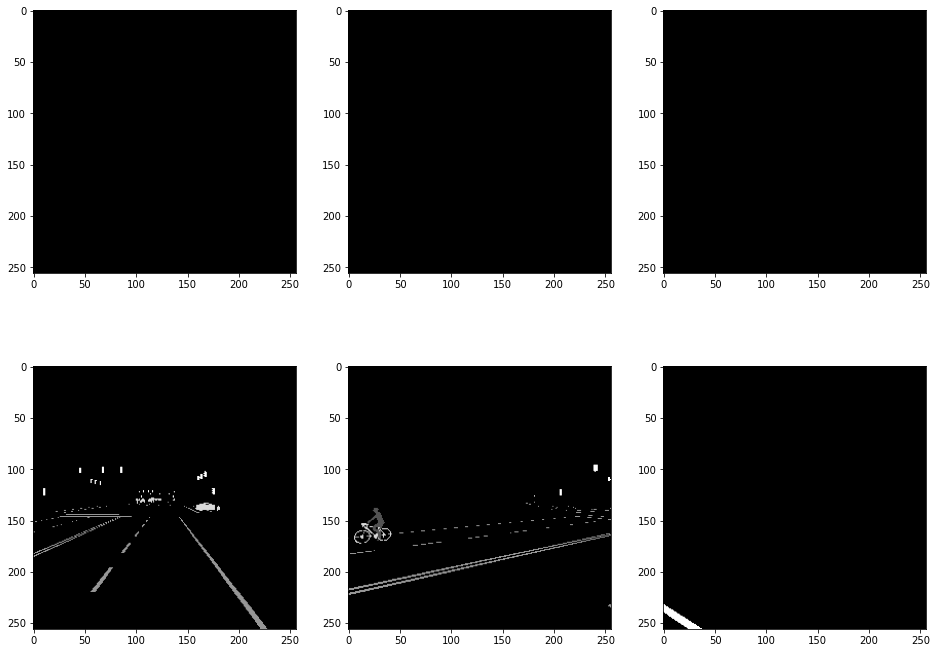

In [23]:
plt.rcParams['figure.figsize'] = (16.0, 12.0) 
f, axarr = plt.subplots(2, 3)
for i in range(3):
    axarr[0][i%3].imshow(pred[i,:,:].detach().cpu().int(), cmap='Greys_r')
    axarr[1][i%3].imshow(seg_label[i,:,:].detach().cpu().int(), cmap='Greys_r')
plt.show()

In [44]:
seg_label.shape

torch.Size([3, 256, 256])

In [13]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16.0, 12.0) 
data = np.load('/root/End2End/data/expert/Town01_short/routes_town01_short_06_12_19_24_59/lidar/0012.npy')    #使用numpy载入npy文件
import open3d as o3d
import numpy as np
np.set_printoptions(suppress=True) # 取消默认科学计数法，open3d无法读取科学计数法表示
data = np.load('./Area_1_conferenceRoom_1.npy')
b = np.array([1 , 1, 1,255, 255, 255]) # 每一列要除的数
np.savetxt('./scene.txt', data[:,:6]/b)
# 读取点云并可视化
pcd =o3d.io.read_point_cloud('./scene.txt', format='xyzrgb') # 原npy文件中的数据正好是按x y z r g b进行排列
print(pcd)
o3d.visualization.draw_geometries([pcd], width=1200, height=600)

ModuleNotFoundError: No module named 'open3d'

In [12]:
depthmap

array([[-3.1318944 , 49.149784  ,  8.684019  ,  0.81870055],
       [-2.7052147 , 38.39879   ,  6.7875257 ,  0.85525876],
       [-3.0861914 , 36.772167  ,  6.506729  ,  0.8608088 ],
       ...,
       [-4.207734  ,  0.14095703, -2.4307156 ,  0.9807422 ],
       [-4.2085547 ,  0.11279297, -2.4306831 ,  0.9807424 ],
       [-4.2095313 ,  0.05638672, -2.4306183 ,  0.98074305]],
      dtype=float32)